<a href="https://colab.research.google.com/github/qTronor/BigData_lessons/blob/main/BigData_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.metrics as stats
import scipy.stats as scistats # !!! Обычно as stats

# 1. Определить два вектора, представляющие собой число автомобилей, припаркованных в течении 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже.
# 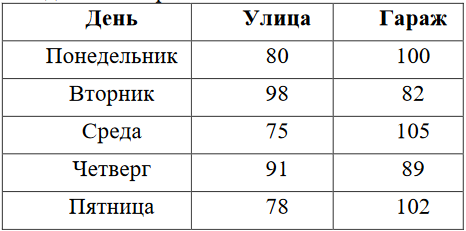

In [ ]:
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

# 1.1 Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону).

In [ ]:
np.corrcoef(street, garage)[0, 1]

-0.9999999999999998

In [ ]:
correlation = np.corrcoef(street, garage)
print(correlation)

[[ 1. -1.]
 [-1.  1.]]


In [ ]:
from scipy.stats import pearsonr
correlation, _ = pearsonr(street, garage)

print(f"Корреляция между 'Улица' и 'Гараж': {correlation:.2f}")

Корреляция между 'Улица' и 'Гараж': -1.00


Сильная отрицательная корреляция

# 1.2 Построить диаграмму рассеяния для вышеупомянутых переменных.

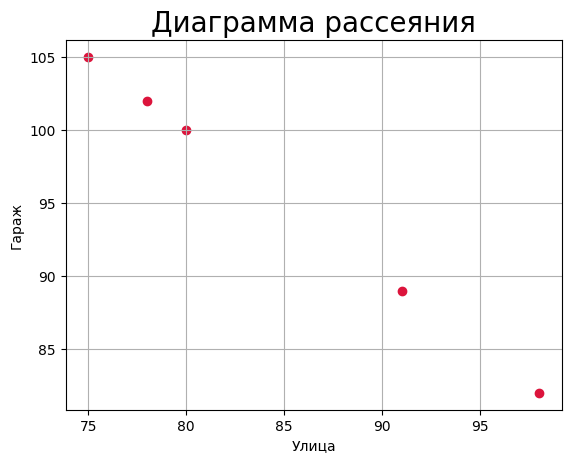

In [ ]:
plt.grid(True)
plt.title("Диаграмма рассеяния", fontsize = 20)
plt.xlabel("Улица")
plt.ylabel("Гараж")
plt.scatter(street, garage, marker = 'o', color = 'crimson')

# 2. Найти и выгрузить данные. Вывести, провести предобработку и описать признаки.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_Datasets/BigData_3/ECDCCases.csv")
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


In [ ]:
print(df.isna().sum())

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64


In [ ]:
df = df.drop("geoId", axis=1)
df = df.drop("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000", axis=1)
print(df.columns)

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'countryterritoryCode', 'popData2019',
       'continentExp'],
      dtype='object')


In [ ]:
country_val = {'countryterritoryCode':'Other', 'popData2019':df['popData2019'].median()}
df.fillna(value=country_val, inplace=True)

In [ ]:
for column in df.columns:
    missing = np.mean(df[column].isna() * 100)
    print(f"{column} : {round(missing, 1)}")
print()
print(df)

dateRep : 0.0
day : 0.0
month : 0.0
year : 0.0
cases : 0.0
deaths : 0.0
countriesAndTerritories : 0.0
countryterritoryCode : 0.0
popData2019 : 0.0
continentExp : 0.0

          dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      14/12/2020   14     12  2020    746       6             Afghanistan   
1      13/12/2020   13     12  2020    298       9             Afghanistan   
2      12/12/2020   12     12  2020    113      11             Afghanistan   
3      12/12/2020   12     12  2020    113      11             Afghanistan   
4      11/12/2020   11     12  2020     63      10             Afghanistan   
...           ...  ...    ...   ...    ...     ...                     ...   
61899  25/03/2020   25      3  2020      0       0                Zimbabwe   
61900  24/03/2020   24      3  2020      0       1                Zimbabwe   
61901  23/03/2020   23      3  2020      0       0                Zimbabwe   
61902  22/03/2020   22      3  2020      1       0   

Признаки day, month, year и dateRep описывают дату, для которой собиралась статистика. Cases количество выявленных случаев заражения COVID-19 за день, deaths - количество смертей. CountriesAndTerritories отражает страну, countryterritoryCode - код этой страны, popData2019 - население этой страны на 2019 год. continentExp - континент, на котором находится страна.

# 2.1 Построить корреляционную матрицу по одной целевой переменной. Определить наиболее коррелирующую переменную, продолжить с ней работу в следующем пункте.

In [ ]:
corr_matrix = df.corr().cases.to_frame().round(3)
corr_matrix.style.background_gradient('coolwarm')

<ipython-input-8-74e7cfba0545>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().cases.to_frame().round(3)


,cases
day,-0.004000
month,0.119000
year,0.006000
cases,1.000000
deaths,0.744000
popData2019,0.308000


In [ ]:
corr_matrix = df.corr().deaths.to_frame().round(3)
corr_matrix.style.background_gradient('coolwarm')

<ipython-input-9-ffcb2555fec8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().deaths.to_frame().round(3)


,deaths
day,-0.007000
month,0.068000
year,0.007000
cases,0.744000
deaths,1.000000
popData2019,0.273000


In [ ]:
corr_matrix = df.corr().popData2019.to_frame().round(3)
corr_matrix.style.background_gradient('coolwarm')

<ipython-input-10-45e9c6d6e974>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().popData2019.to_frame().round(3)


,popData2019
day,-0.003000
month,-0.050000
year,-0.010000
cases,0.308000
deaths,0.273000
popData2019,1.000000


In [ ]:
corr_matrix = df.corr().round(3)
corr_matrix.style.background_gradient('coolwarm')

<ipython-input-11-b0c6e89b9f25>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().round(3)


,day,month,year,cases,deaths,popData2019
day,1.000000,-0.110000,-0.057000,-0.004000,-0.007000,-0.003000
month,-0.110000,1.000000,-0.055000,0.119000,0.068000,-0.050000
year,-0.057000,-0.055000,1.000000,0.006000,0.007000,-0.010000
cases,-0.004000,0.119000,0.006000,1.000000,0.744000,0.308000
deaths,-0.007000,0.068000,0.007000,0.744000,1.000000,0.273000
popData2019,-0.003000,-0.050000,-0.010000,0.308000,0.273000,1.000000


In [ ]:
#Определение самой коррелирующей переменной
columns_to_corr = ['cases', 'deaths', 'popData2019']
corr_val_list = []
dataset_to_corr = pd.DataFrame(df, columns = ['cases', 'deaths', 'popData2019'])
corr_matrix = dataset_to_corr.corr()
max = -1
sum_score_list = []
for feauture in columns_to_corr:
    corr_sum = 0
    for feauture_to_compare in columns_to_corr:
        corr = abs(round(df[feauture].corr(df[feauture_to_compare]), 2))
        corr_sum += corr
    if corr_sum > max:
        max = corr_sum
        max_corr_feauture = feauture
    sum_score_list.append(corr_sum)
score_dict = {columns_to_corr[i]: sum_score_list[i] for i in range(0,3)}

print(f"Переменная с максимальной суммарной корреляцией - {max_corr_feauture}")
print(f"Суммарная корреляция ко всем остальным переменным относительно текущей - {score_dict[max_corr_feauture]}")

Переменная с максимальной суммарной корреляцией - cases
Суммарная корреляция ко всем остальным переменным относительно текущей - 2.05


# 2.2 Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE.

In [ ]:
model = LinearRegression()


In [ ]:
x = np.array(df['deaths']).reshape(-1, 1)
y = np.array(df['cases'])

In [ ]:
model.fit(x, y)

LinearRegression()

In [ ]:
model.coef_, model.intercept_

(array([38.41170663]), 154.30092742273678)

38.41170662842138 154.30092742273678


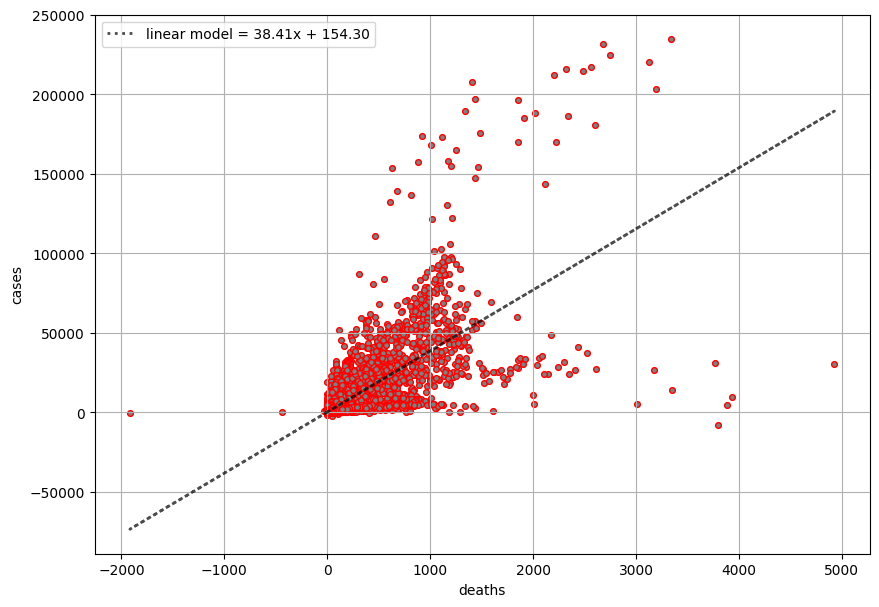

In [ ]:
k = model.coef_[0]
b = model.intercept_

print(k, b)

y_regr = k * x + b
plt.figure(figsize = (10,7))
plt.plot(x, y_regr, alpha = 0.7, lw=2, color='black', ls='dotted',
         label=f'linear model = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
         )
plt.legend()
plt.xlabel('deaths')
plt.ylabel('cases')
plt.scatter(x, y, color='grey', edgecolors='red', lw=1, s=17)
plt.grid(True)

In [ ]:
print(f"k = {model.coef_[0]:.2f}")
print(f"b = {model.intercept_:.2f}")
print(f"MSE = {stats.mean_squared_error(y, y_regr):.2f}")

k = 38.41
b = 154.30
MSE = 20548041.80


In [ ]:
def mserror(x, w_k, w_b, y):
    y_regr_manual = w_k * x[:, 0] + w_b
    return np.sum((y - y_regr_manual) ** 2) / len(y_regr_manual)


#функция для вычисления grad(mse)\n",
def grad_mserror(x, w_k, w_b, y):
    y_regr_manual = w_k * x[:,0] + w_b
    return np.array([2/len(x) * np.sum(y - y_regr_manual) * (-1),
                    2/len(x) * np.sum((y - y_regr_manual) * (-x[:, 0]))])

In [ ]:
eps = 0.001

#начальное состояние",
w_k = 0
w_b = 0

next_w_k = w_k
next_w_b = w_b

#размер шага
learning_rate = 0.00001

#Определение количества итераций,
n = 10000000000000

for i in range(n):
    cur_w_k = next_w_k
    cur_w_b = next_w_b

    #движение в сторону, противоположную направлению градиента\n",
    next_w_k = cur_w_k - learning_rate * grad_mserror(x, cur_w_k, cur_w_b, y)[1]
    next_w_b = cur_w_b - learning_rate * grad_mserror(x, cur_w_k, cur_w_b, y)[0]

    #Остновка вычисления, когда достигнута требуемая точность\n",
    if i > 56530:
        print(f"Итерация {i}")
        print(f"Текущая точка {cur_w_k, cur_w_b} | Следующая точка {next_w_k, next_w_b}")
        print(f"MSE = {mserror(x, cur_w_k, cur_w_b, y)}")
        print("------------------------------------------------------------------------------------")
    if abs(cur_w_k - next_w_k) < eps and abs(cur_w_b - next_w_b) < eps:
        print("The end of calculations")
        break

Итерация 56531
Текущая точка (38.48737259753492, 102.3243799010691) | Следующая точка (38.4873711416137, 102.3253800040163)
MSE = 20550640.90296073
------------------------------------------------------------------------------------
Итерация 56532
Текущая точка (38.4873711416137, 102.3253800040163) | Следующая точка (38.48736968572049, 102.32638008772008)
MSE = 20550640.802940883
------------------------------------------------------------------------------------
Итерация 56533
Текущая точка (38.48736968572049, 102.32638008772008) | Следующая точка (38.48736822985529, 102.32738015218084)
MSE = 20550640.702924892
------------------------------------------------------------------------------------
Итерация 56534
Текущая точка (38.48736822985529, 102.32738015218084) | Следующая точка (38.487366774018106, 102.32838019739891)
MSE = 20550640.60291275
------------------------------------------------------------------------------------
Итерация 56535
Текущая точка (38.487366774018106, 102.3283

# 2.3 Визуализировать регрессию на графике.

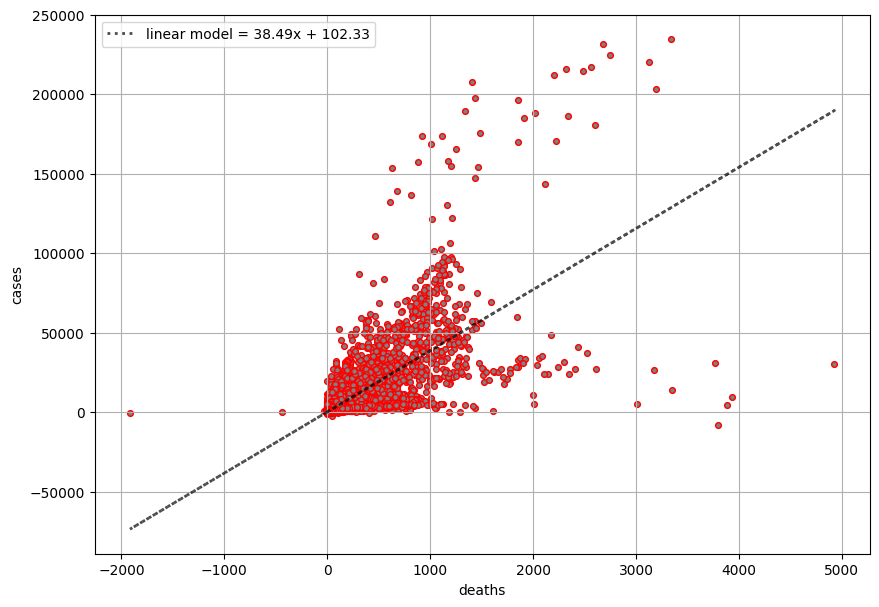

In [ ]:
k_man = next_w_k
b_man = next_w_b

y_regr_manual = k_man * x + b_man
plt.figure(figsize = (10,7))
plt.plot(x, y_regr_manual, alpha = 0.7, lw=2, color='black', ls='dotted',
         label=f"linear model = {k_man:.2f}x + {b_man:.2f}")
plt.legend()
plt.xlabel('deaths')
plt.ylabel('cases')
plt.scatter(x, y, color='grey', edgecolors='red', lw=1, s=17)
plt.grid(True)

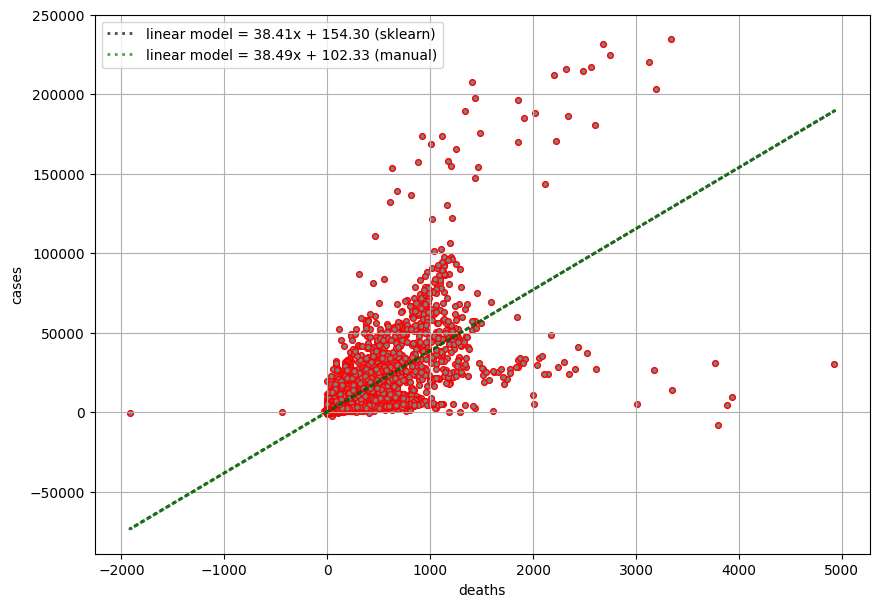

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(x, y_regr, alpha = 0.7, lw=2, color='black', ls='dotted',
         label=f"linear model = {k:.2f}x + {b:.2f} (sklearn)")

plt.plot(x, y_regr_manual, alpha = 0.7, lw=2, color='green', ls='dotted',
         label=f"linear model = {k_man:.2f}x + {b_man:.2f} (manual)")

plt.legend()
plt.xlabel('deaths')
plt.ylabel('cases')
plt.scatter(x, y, color='grey', edgecolors='red', lw=1, s=17)
plt.grid(True)

In [ ]:
print(f"k = {k_man:.2f}")
print(f"b = {b_man:.2f}")
print()
print(f"MSE = {stats.mean_squared_error(y, y_regr_manual):.2f}")

------------------//Параметры обученной модели//--------------
k = 38.49
b = 102.33

----------------------//Метрики//---------------------------
MSE = 20550640.20


# 3. Загрузить данные: 'insurance.csv'. Вывести и провести предобработку. Вывести список уникальных регионов.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_Datasets/BigData_3/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
print(df['region'])

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object


In [ ]:
unique_regions = df.region.unique()
print(f"Уникальные регионы - {'|'.join(map(str, unique_regions))}")

Уникальные регионы - southwest|southeast|northwest|northeast


# 3.1 Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя первый способ, через библиотеку Scipy.


In [ ]:
ins_part = df[['region','bmi']]
groups_list = []
# print(ins_part)
groups = df.groupby('region').groups
for region in unique_regions:
    groups_list.append(ins_part.iloc[groups[region]]['bmi'])

scistats.f_oneway(*groups_list)

F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)

Регион влияет на bmi
p > 0.05

# 3.2 Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя второй способ, с помощью функции anova_lm() из библиотеки statsmodels.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = df[['bmi','region']]
model = ols('bmi ~ region',data = data).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

print(anova_result)

                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN


# 3.3 С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони. Сделать выводы.

In [ ]:
region_pairs = []

for region_1 in range(3):
    for region_2 in range(region_1 + 1, 4):
        region_pairs.append((unique_regions[region_1], unique_regions[region_2]))


for region_1, region_2 in region_pairs:
    print(region_1, region_2)
    print(scistats.ttest_ind(ins_part.iloc[groups[region_1]]['bmi'], ins_part.iloc[groups[region_2]]['bmi']))

bonf_corr = 0.05 / 4
print("----------------------")
print("Поправка Бонферрони = ", bonf_corr)

southwest southeast
TtestResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09, df=687.0)
southwest northwest
TtestResult(statistic=3.2844171500398582, pvalue=0.001076958496307695, df=648.0)
southwest northeast
TtestResult(statistic=3.1169000930045923, pvalue=0.0019086161671573072, df=647.0)
southeast northwest
TtestResult(statistic=9.25649013552548, pvalue=2.643571405230106e-19, df=687.0)
southeast northeast
TtestResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17, df=686.0)
northwest northeast
TtestResult(statistic=0.060307727183293185, pvalue=0.951929170821864, df=647.0)
--------------------------------------
Поправка Бонферрони =  0.0125


Northwest northeast принадлежат одной генеральной совокупности

# 3.4 Выполнить пост-хок тесты Тьюки и построить график.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(ins_part['bmi'])

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

tukey = pairwise_tukeyhsd(endog = ins_part['bmi'], groups=ins_part['region'], alpha=0.07)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.0951,1.1477,False
northeast,southeast,4.1825,0.0,3.0915,5.2735,True
northeast,southwest,1.4231,0.0107,0.3017,2.5445,True
northwest,southeast,4.1562,0.0,3.0661,5.2463,True
northwest,southwest,1.3968,0.0127,0.2763,2.5174,True
southeast,southwest,-2.7594,0.0,-3.8495,-1.6693,True


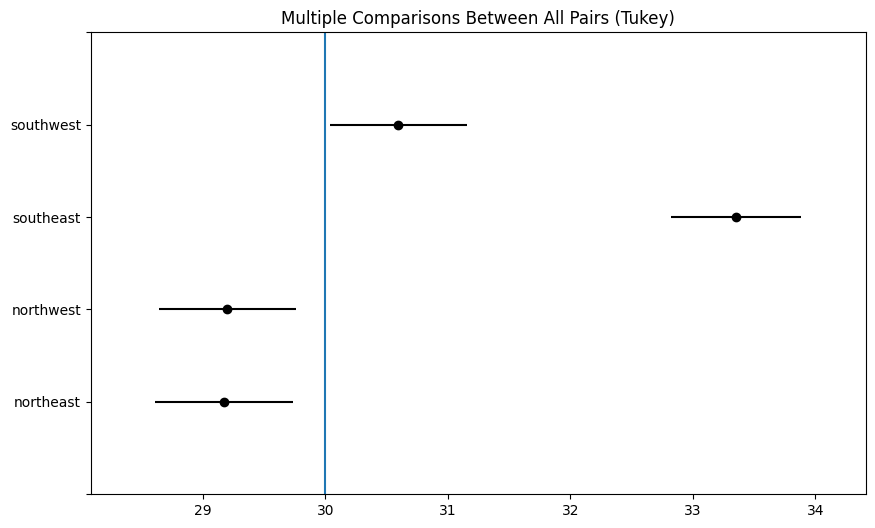

In [ ]:
tukey = pairwise_tukeyhsd(endog = ins_part['bmi'], groups=ins_part['region'], alpha=0.07).plot_simultaneous()
plt.vlines(x=30, ymin=-2, ymax=10)

# 3.5 Выполнить двухфакторный ANOVA тест, чтобы проверить влияние региона и пола на индекс массы тела (BMI), используя функцию anova_lm() из библиотеки statsmodels.

In [ ]:
data = df
print(data)
model_oth = ols('bmi ~ region + sex + region:sex',data = data)
model_oth = model_oth.fit()
anova_result = sm.stats.anova_lm(model_oth, typ=2)

print(anova_result)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
                  sum_sq      df          F        PR(>F)
region       4034.975135     3.0  39.398134  2.163195e-24
sex            86.007035     1.0   2.519359  1.126940e-

Как можно видеть из ANOVA теста, регион оказывает существенное влияние на BMI(индекс массы тела). В то время, как пол и пол+регион не оказывает существенного влияния

# 3.6 Выполнить пост-хок тесты Тьюки и построить график.

In [ ]:
df['sex+region'] = df['region'] + ' / ' + df['sex']
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

              sex+region  
0     southwest / female  
1       southeast / male  
2       southeast / male  
3       northwest / male  
4       northwest / male

In [ ]:
tukey = pairwise_tukeyhsd(endog = df['bmi'], groups=df['sex+region'], alpha=0.07)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast / female,northeast / male,-0.2998,0.9998,-2.1936,1.594,False
northeast / female,northwest / female,-0.0464,1.0,-1.9373,1.8446,False
northeast / female,northwest / male,-0.2042,1.0,-2.1038,1.6955,False
northeast / female,southeast / female,3.3469,0.0,1.4857,5.2082,True
northeast / female,southeast / male,4.6657,0.0,2.8377,6.4936,True
northeast / female,southwest / female,0.7362,0.9497,-1.1605,2.6329,False
northeast / female,southwest / male,1.8051,0.1007,-0.0887,3.6989,False
northeast / male,northwest / female,0.2534,0.9999,-1.6317,2.1385,False
northeast / male,northwest / male,0.0956,1.0,-1.7982,1.9894,False
northeast / male,southeast / female,3.6467,0.0,1.7914,5.502,True


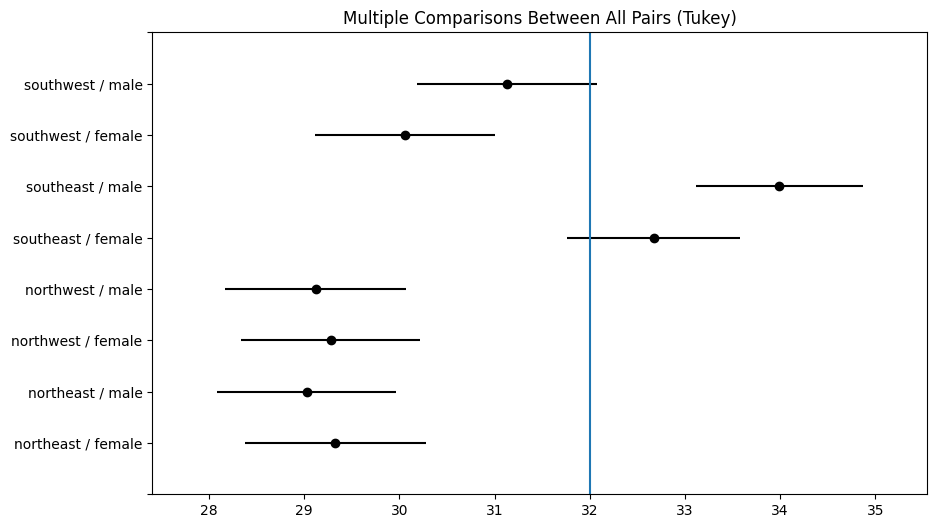

In [ ]:
tukey = pairwise_tukeyhsd(endog = df['bmi'], groups=df['sex+region'], alpha=0.07).plot_simultaneous()
plt.vlines(x=32, ymin=-2, ymax=10)